In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/boston_cocktails.csv"

df = pd.read_csv(url)

df

,name,category,row_id,ingredient_number,ingredient,measure
0,Gauguin,Cocktail Classics,1,1,Light Rum,2 oz
1,Gauguin,Cocktail Classics,1,2,Passion Fruit Syrup,1 oz
2,Gauguin,Cocktail Classics,1,3,Lemon Juice,1 oz
3,Gauguin,Cocktail Classics,1,4,Lime Juice,1 oz
4,Fort Lauderdale,Cocktail Classics,2,1,Light Rum,1 1/2 oz
...,...,...,...,...,...,...
3638,Vow Of Silence,Gin,990,2,Grapefruit Juice,3/4 oz
3639,Vow Of Silence,Gin,990,3,Fresh Lime Juice,1/2 oz
3640,Vow Of Silence,Gin,990,4,Yellow Chartreuse,1/2 oz
3641,Vow Of Silence,Gin,990,5,Amaro,1/4 oz


In [28]:
df.columns

Index(['name', 'category', 'ingredient'], dtype='object')

In [ ]:
df['ingredient']

In [4]:
# na values have been checked... none exist

df.isna().sum()

name                 0
category             0
row_id               0
ingredient_number    0
ingredient           0
measure              0
dtype: int64

In [5]:
# checking / removing duplicates 

df_lower = df.applymap(lambda s: s.lower() if type(s) == str else s)

df_lower.duplicated().sum()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_30896\405245265.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lower = df.applymap(lambda s: s.lower() if type(s) == str else s)


0

In [6]:
martini_df = df[df['name'].str.contains(('martini'), case=False, na=False)]
martini_df

# locations to drop by row_id: (review martini and think of other cocktails that may need to be reviewed)

,name,category,row_id,ingredient_number,ingredient,measure
189,Martini (Medium),Cocktail Classics,54,1,Gin,1 1/2 oz
190,Martini (Medium),Cocktail Classics,54,2,Dry Vermouth,1/2 oz
191,Martini (Medium),Cocktail Classics,54,3,Sweet Vermouth,1/2 oz
192,Martini (Dry) (5-to-1),Cocktail Classics,55,1,Gin,1 2/3 oz
193,Martini (Dry) (5-to-1),Cocktail Classics,55,2,Dry Vermouth,1/3 oz
328,Dry Martini (5-to-1),Cocktail Classics,98,1,Gin,1 2/3 oz
329,Dry Martini (5-to-1),Cocktail Classics,98,2,Dry Vermouth,1/3 oz
452,Hennessy Martini,Cocktail Classics,136,1,Hennessy V.S Cognac,2 oz
453,Hennessy Martini,Cocktail Classics,136,2,Lemon Juice,1/2 oz
579,Sake Martini,Cocktail Classics,178,1,Sake,1 oz


In [7]:
df = df[df['category'] != "Non-alcoholic Drinks"]
df['category'].unique()

array(['Cocktail Classics', 'Cordials and Liqueurs', 'Whiskies', 'Brandy',
       'Vodka', 'Rum - Daiquiris', 'Rum', 'Tequila', 'Shooters', 'Gin'],
      dtype=object)

In [8]:
df.columns

Index(['name', 'category', 'row_id', 'ingredient_number', 'ingredient',
       'measure'],
      dtype='object')

In [9]:
# dropping columns: measure, ingredient number, row_id, category
df = df.drop(columns=['row_id', 'measure', 'ingredient_number'])

In [18]:
df['ingredient'].unique()

array(['Light Rum', 'Passion Fruit Syrup', 'Lemon Juice', 'Lime Juice',
       'Sweet Vermouth', 'Juice of Orange', 'Juice of a Lime',
       'Apple schnapps', 'Cinnamon schnapps', 'Powdered Sugar',
       'Dark rum', 'Cranberry Juice', 'Pineapple Juice', 'Orange curacao',
       'Sour Mix', 'Bourbon whiskey', 'Fresh lemon juice', 'Simple Syrup',
       'Soda water', 'Orange and lemon wheels, maraschino cherry',
       'cherry-flavored brandy', 'Light cream', 'Triple Sec',
       'Maraschino', 'Creme de banana', 'Amaretto', 'Scotch Whiskey',
       'Fresh carrot juice', 'Tawny port', 'Agave nectar', 'Bacardi Rum',
       'Grenadine', 'Apple Brandy', 'Brandy', 'Gin', 'Anisette',
       'Orange Juice', 'Dry Vermouth', 'Apricot Flavored Brandy',
       'White creme de menthe', 'Sloe gin', 'Green creme de menthe',
       'Fresh Lime Juice', 'Fresh mint leaves', 'Tanqueray gin',
       'Margarita Mix', 'Orange half-wheel', 'Green Chartreuse',
       'Orange Bitters', 'Bitters', 'Straight ry

In [25]:
df_onehot = df.groupby('name')['ingredient'].apply(lambda x: '|'.join(x)).str.get_dummies(sep='|')
df_onehot.corr()

,100-proof Vodka,151-Proof Rum,17-year-old J. Wray and Nephew Ltd. Rum,7-Up,Absinthe,Absinthe Substitute,Absinthe or pastis,Acai berry flavored vodka,African rum,Agave nectar,...,orgeat or almond syrup,pineapple,pomegranate molasses (available at Middle Eastern grocers),port,powdered sugar,red wine,springs mint,sweet vermouth,thin Peeled fresh ginger,"tiki bitters, such as Bittermen's Elemakule"
100-proof Vodka,1.000000,-0.002270,-0.001013,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,-0.001013,-0.001013,-0.001013,-0.001013,-0.001013
151-Proof Rum,-0.002270,1.000000,-0.002270,-0.002270,-0.006025,-0.006025,-0.004547,-0.002270,-0.002270,-0.007212,...,-0.005575,-0.002270,-0.002270,-0.002270,-0.003212,-0.002270,-0.002270,-0.002270,-0.002270,-0.002270
17-year-old J. Wray and Nephew Ltd. Rum,-0.001013,-0.002270,1.000000,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,-0.001013,-0.001013,-0.001013,-0.001013,-0.001013
7-Up,-0.001013,-0.002270,-0.001013,1.000000,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,-0.001013,-0.001013,-0.001013,-0.001013,-0.001013
Absinthe,-0.002689,-0.006025,-0.002689,-0.002689,1.000000,-0.007136,-0.005386,-0.002689,-0.002689,0.112018,...,-0.006603,-0.002689,-0.002689,-0.002689,-0.003804,-0.002689,-0.002689,-0.002689,-0.002689,-0.002689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
red wine,-0.001013,-0.002270,-0.001013,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,1.000000,-0.001013,-0.001013,-0.001013,-0.001013
springs mint,-0.001013,-0.002270,-0.001013,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,-0.001013,1.000000,-0.001013,-0.001013,-0.001013
sweet vermouth,-0.001013,-0.002270,-0.001013,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,1.000000,-0.001013,-0.001013,-0.001434,-0.001013,-0.001013,1.000000,-0.001013,-0.001013
thin Peeled fresh ginger,-0.001013,-0.002270,-0.001013,-0.001013,-0.002689,-0.002689,-0.002029,-0.001013,-0.001013,-0.003219,...,-0.002488,-0.001013,-0.001013,-0.001013,-0.001434,-0.001013,-0.001013,-0.001013,1.000000,-0.001013


In [26]:
correlation_matrix = df_onehot.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
tri_df = correlation_matrix.mask(mask)
average_correlation = tri_df.stack().mean()
print(f"Average correlation: {average_correlation:.2f}")

Average correlation: 0.00


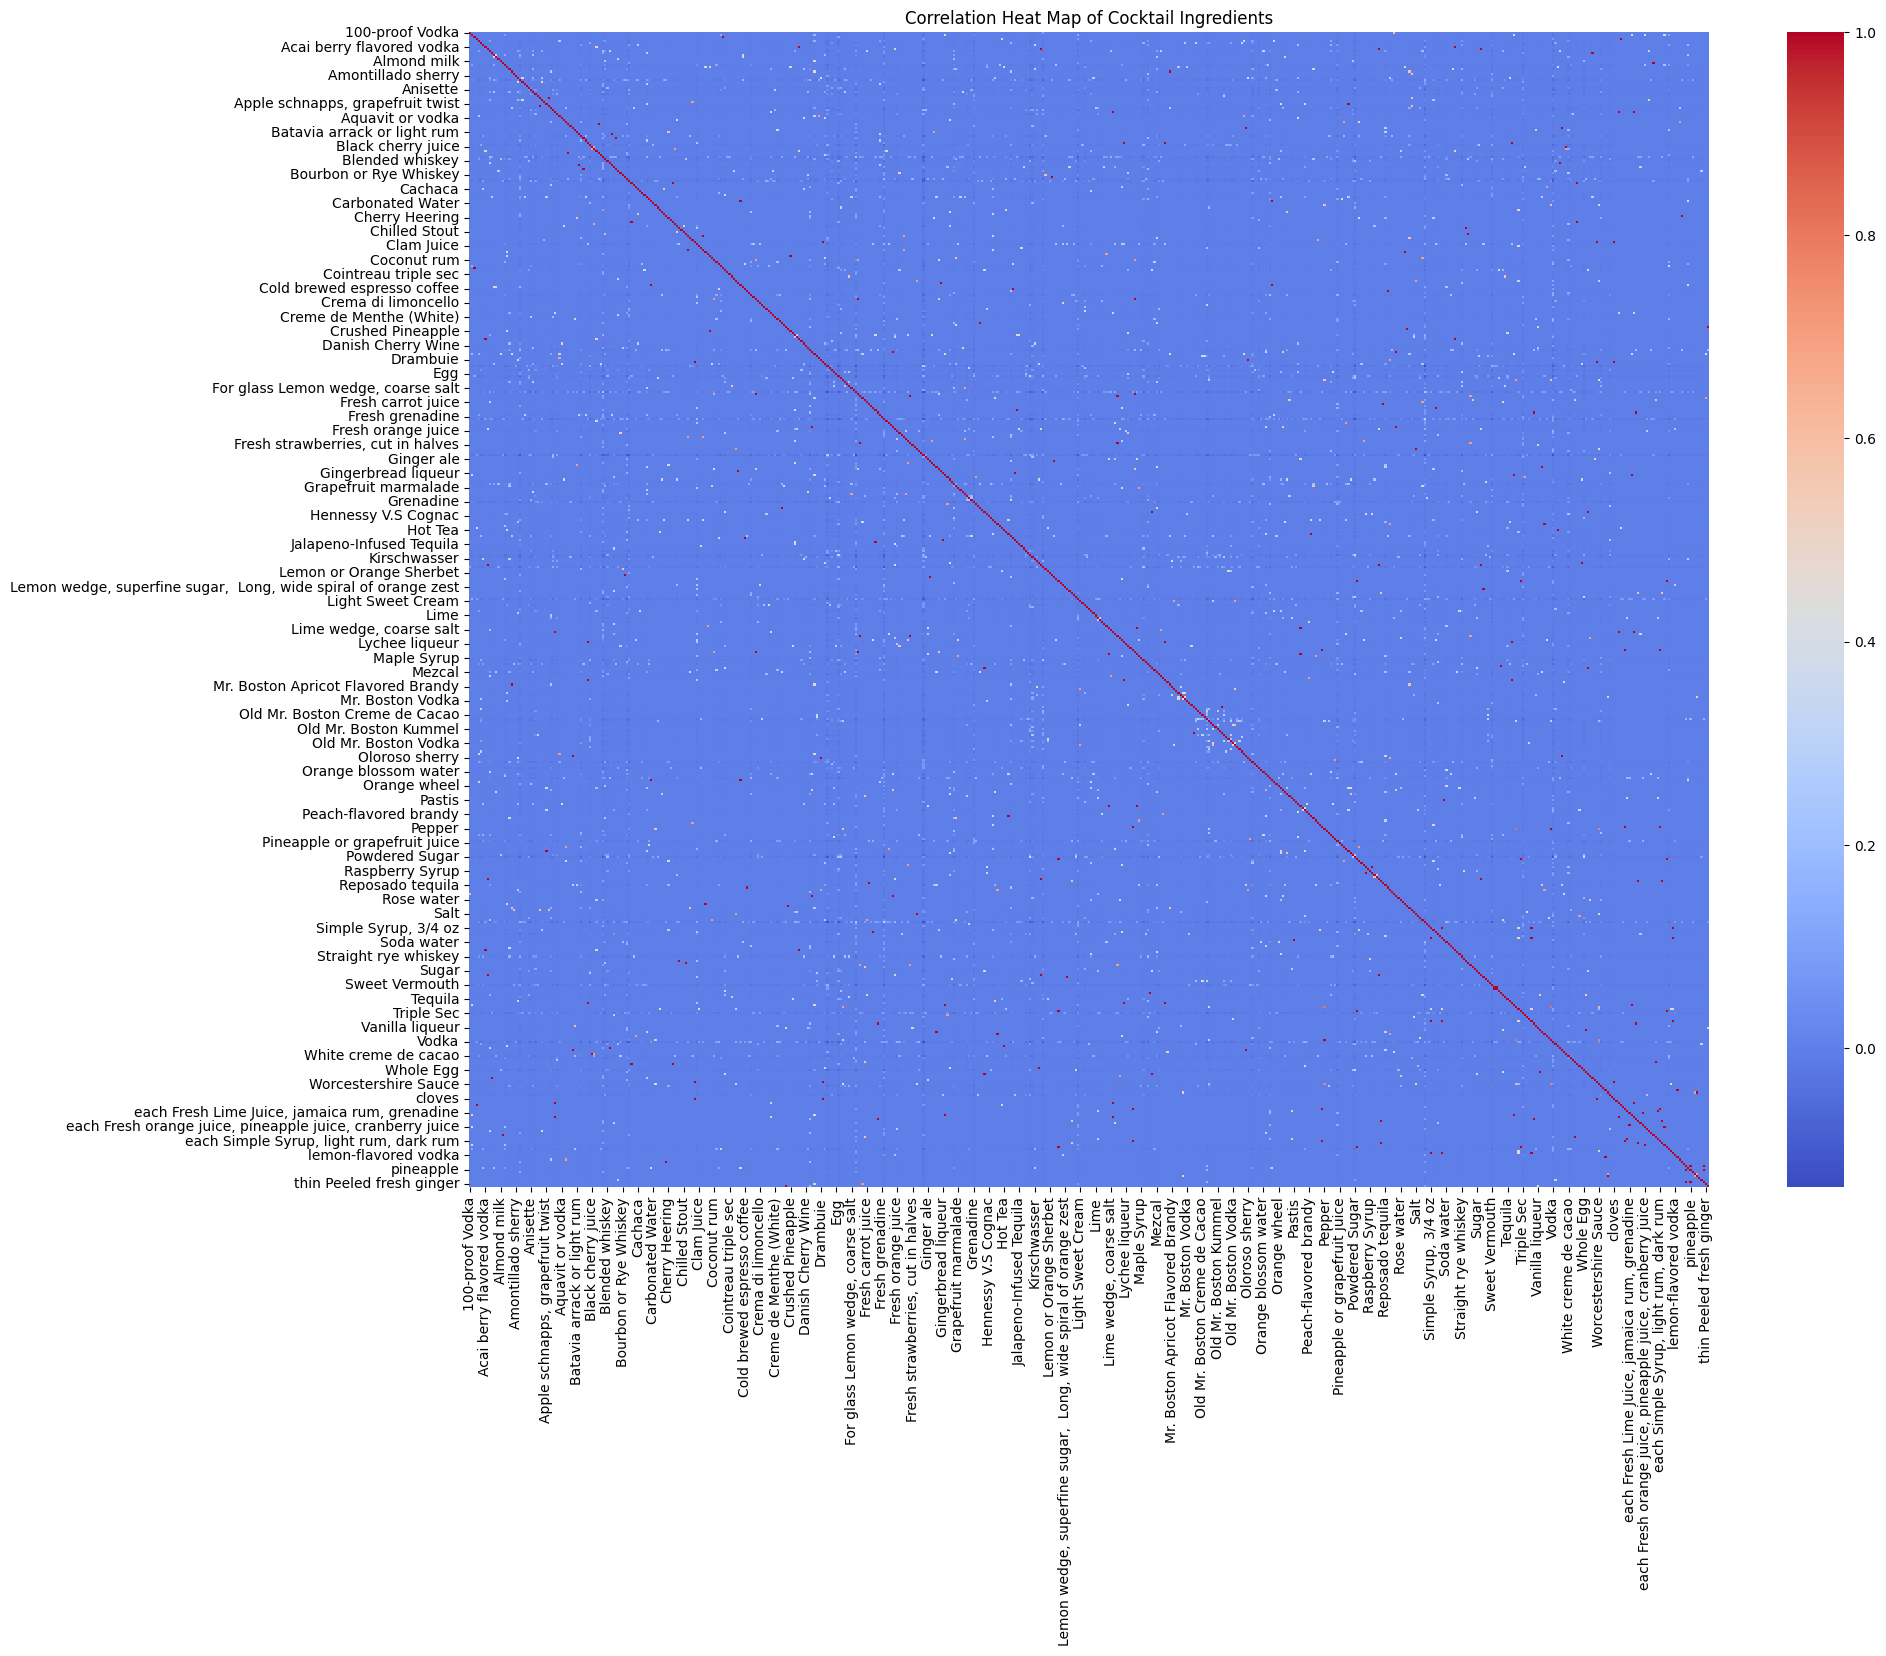

In [29]:
plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heat Map of Cocktail Ingredients')
plt.show()

In [30]:
df.to_csv('cocktails_onehot.csv')